<h1>Extracting Stock Data Using a Python Library</h1>


In [ ]:
!pip install yfinance
!pip install matplotlib
!pip install pandas

## Q1 - Extracting Tesla Stock Data Using yfinance 


In [3]:
import yfinance as yf
import pandas as pd

# Download Tesla stock data (default is last 30 days)
tesla_data = yf.download('TSLA')

# Reset the index to move the Date from index to a column
tesla_data.reset_index(inplace=True)

# Save the dataframe to a CSV file
tesla_data.to_csv('tesla_data.csv', index=False)

# Display the first five rows
print(tesla_data.head())

[*********************100%***********************]  1 of 1 completed

Price        Date     Close      High       Low      Open     Volume
Ticker                 TSLA      TSLA      TSLA      TSLA       TSLA
0      2010-06-29  1.592667  1.666667  1.169333  1.266667  281494500
1      2010-06-30  1.588667  2.028000  1.553333  1.719333  257806500
2      2010-07-01  1.464000  1.728000  1.351333  1.666667  123282000
3      2010-07-02  1.280000  1.540000  1.247333  1.533333   77097000
4      2010-07-06  1.074000  1.333333  1.055333  1.333333  103003500


## Q2 - Use Webscraping to Extract Tesla Revenue Data


In [8]:
!pip install lxml

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 84.9 MB/s eta 0:00:00


In [11]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL of the Tesla revenue page
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

# Add headers to simulate a browser visit
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.212 Safari/537.36"
}

# Fetch the page
response = requests.get(url, headers=headers)

# Parse the HTML
soup = BeautifulSoup(response.text, "html.parser")

# Find the table that contains revenue data
tables = soup.find_all("table")
revenue_table = None

for table in tables:
    if "Tesla Quarterly Revenue" in str(table):
        revenue_table = table
        break

# Extract data into a dataframe
data = []
if revenue_table:
    rows = revenue_table.find_all("tr")
    for row in rows[1:]:  # skip header
        cols = row.find_all("td")
        if len(cols) == 2:
            date = cols[0].text.strip()
            revenue = cols[1].text.strip()
            data.append([date, revenue])

    tesla_revenue = pd.DataFrame(data, columns=["Date", "Revenue"])

    # Display last 5 rows
    print(tesla_revenue.tail())
else:
    print("Revenue table not found.")


          Date Revenue
58  2010-06-30     $28
59  2010-03-31     $21
60  2009-12-31        
61  2009-09-30     $46
62  2009-06-30     $27


Now we can access functions and variables to extract the type of data we need. You can view them and what they represent here https://aroussi.com/post/python-yahoo-finance.


## Q3 - Extracting GME Stock Data Using yfinance


In [12]:
import yfinance as yf
import pandas as pd

# Download GME stock data (e.g., for the past 5 years)
gme_data = yf.download("GME", start="2020-01-01", end="2025-01-01")

# Reset index to move the Date from index to a column
gme_data.reset_index(inplace=True)

# Save to CSV
gme_data.to_csv("gme_stock_data.csv", index=False)

# Display the first 5 rows
print(gme_data.head())


[*********************100%***********************]  1 of 1 completed

Price        Date   Close    High     Low    Open    Volume
Ticker                GME     GME     GME     GME       GME
0      2020-01-02  1.5775  1.6175  1.5175  1.5350  17814400
1      2020-01-03  1.4700  1.5625  1.4600  1.5525  14175600
2      2020-01-06  1.4625  1.4775  1.4000  1.4500  13579200
3      2020-01-07  1.3800  1.4575  1.3600  1.4425  20912000
4      2020-01-08  1.4300  1.4625  1.3525  1.3725  22517600


## Q4 - Use Webscraping to Extract GME Revenue Data


In [13]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL containing GME revenue data
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"

# Send HTTP request to the webpage
headers = {"User-Agent": "Mozilla/5.0"}
response = requests.get(url, headers=headers)

# Parse HTML
soup = BeautifulSoup(response.text, "html.parser")

# Find the revenue table by inspecting class
tables = soup.find_all("table")
revenue_table = None
for table in tables:
    if "Annual Revenue" in table.text:
        revenue_table = table
        break

# Extract table rows
data = []
if revenue_table:
    rows = revenue_table.find_all("tr")
    for row in rows[1:]:  # skip header
        cols = row.find_all("td")
        if len(cols) == 2:
            date = cols[0].text.strip()
            revenue = cols[1].text.strip().replace("$", "").replace(",", "")
            if revenue != "":
                data.append([date, float(revenue)])

# Create DataFrame
gme_revenue = pd.DataFrame(data, columns=["Date", "Revenue (in millions)"])

# Display the last five rows
print(gme_revenue.tail())


    Date  Revenue (in millions)
12  2013                 8887.0
13  2012                 9551.0
14  2011                 9474.0
15  2010                 9078.0
16  2009                 8806.0


[*********************100%***********************]  1 of 1 completed


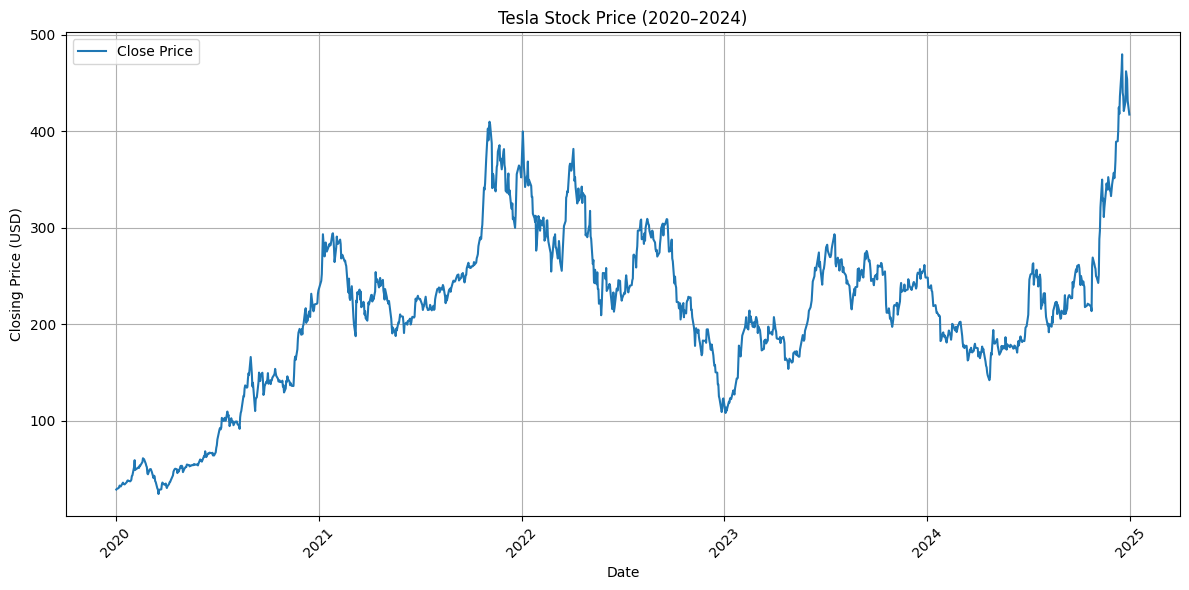

In [15]:
import yfinance as yf
import matplotlib.pyplot as plt

# Define the function to plot stock data
def make_graph(stock_data, title):
    plt.figure(figsize=(12, 6))
    plt.plot(stock_data['Date'], stock_data['Close'], label='Close Price')
    plt.xlabel('Date')
    plt.ylabel('Closing Price (USD)')
    plt.title(title)
    plt.grid(True)
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Download Tesla stock data
tesla_data = yf.download("TSLA", start="2020-01-01", end="2024-12-31")
tesla_data.reset_index(inplace=True)

# Plot Tesla stock graph
make_graph(tesla_data, "Tesla Stock Price (2020–2024)")


[*********************100%***********************]  1 of 1 completed


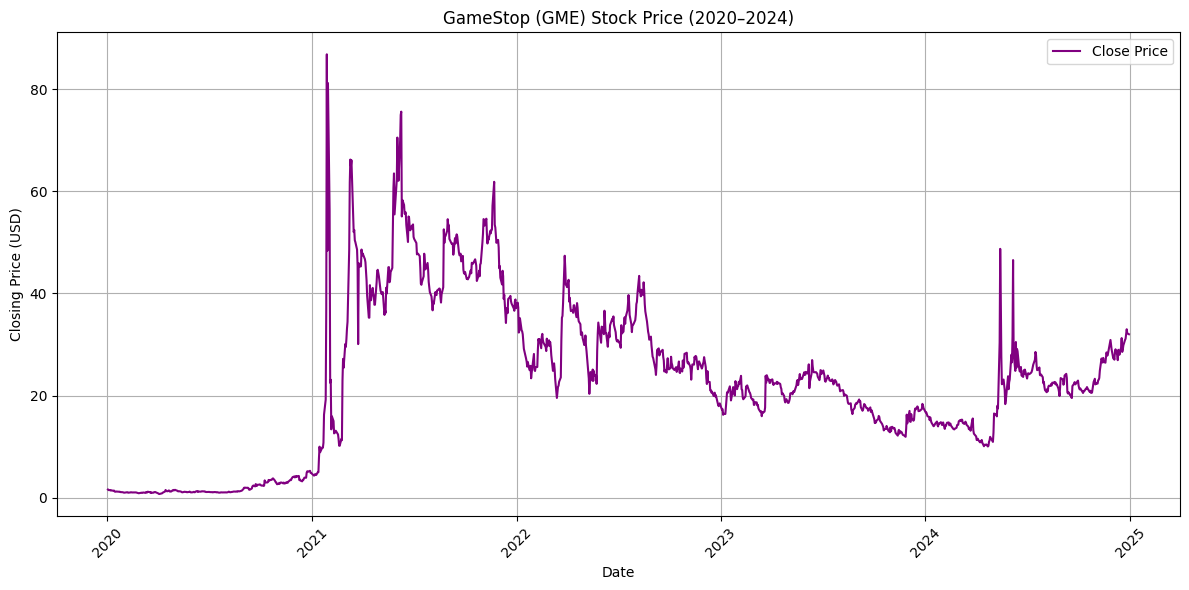

In [16]:
import yfinance as yf
import matplotlib.pyplot as plt

# Define the function to plot stock data
def make_graph(stock_data, title):
    plt.figure(figsize=(12, 6))
    plt.plot(stock_data['Date'], stock_data['Close'], label='Close Price', color='purple')
    plt.xlabel('Date')
    plt.ylabel('Closing Price (USD)')
    plt.title(title)
    plt.grid(True)
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Download GameStop stock data
gme_data = yf.download("GME", start="2020-01-01", end="2024-12-31")
gme_data.reset_index(inplace=True)

# Plot GameStop stock graph
make_graph(gme_data, "GameStop (GME) Stock Price (2020–2024)")
